# 视觉变换样例库

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.2/resource/_static/logo_notebook.svg)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/r2.2/docs/api_python/samples/dataset/vision_gallery.ipynb)&emsp;
[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.2/resource/_static/logo_source.svg)](https://gitee.com/mindspore/mindspore/blob/r2.2/docs/api/api_python/samples/dataset/vision_gallery.ipynb)

此指南展示了[mindpore.dataset.vision](https://mindspore.cn/docs/zh-CN/r2.2/api_python/mindspore.dataset.transforms.html#%E8%A7%86%E8%A7%89)模块中各种变换的用法。

## 环境准备

In [1]:
from download import download
import matplotlib.pyplot as plt
from PIL import Image

import mindspore.dataset as ds
import mindspore.dataset.vision as vision

# Download opensource datasets
url = "https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/datasets/flamingos.jpg"
download(url, './flamingos.jpg', replace=True)
orig_img = Image.open('flamingos.jpg')

# Env set for randomness and prepare plot function
ds.config.set_seed(66)

def plot(imgs, first_origin=True, **kwargs):
    num_rows = 1
    num_cols = len(imgs) + first_origin

    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    if first_origin:
        imgs = [orig_img] + imgs
    for idx, img in enumerate(imgs):
        ax = axs[0, idx]
        ax.imshow(img, **kwargs)
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if first_origin:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    plt.tight_layout()


file_sizes: 100%|███████████████████████████| 45.8k/45.8k [00:00<00:00, 640kB/s]
Successfully downloaded file to ./flamingos.jpg


## 几何变换

几何图像变换是指改变图像的几何属性，如其形状、大小、方向或位置，其涉及对图像像素或坐标进行数学运算。

### Pad

[mindspore.dataset.vision.Pad](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.Pad.html#mindspore.dataset.vision.Pad) 会对图像的边缘填充像素。

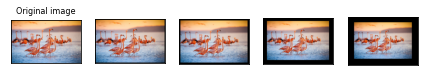

In [2]:
padded_imgs = [vision.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

### Resize

[mindspore.dataset.vision.Resize](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.Resize.html#mindspore.dataset.vision.Resize) 会调整图像的尺寸大小。

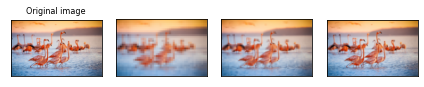

In [3]:
resized_imgs = [vision.Resize(size=size)(orig_img) for size in (30, 50, 100)]
plot(resized_imgs)

### CenterCrop

[mindspore.dataset.vision.CenterCrop](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.CenterCrop.html#mindspore.dataset.vision.CenterCrop) 会在图像中裁剪出中心区域。

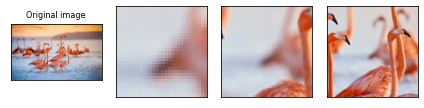

In [4]:
center_crops = [vision.CenterCrop(size=size)(orig_img) for size in (30, 50, 100)]
plot(center_crops)

### FiveCrop

[mindspore.dataset.vision.FiveCrop](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.FiveCrop.html#mindspore.dataset.vision.FiveCrop) 在图像的中心与四个角处分别裁剪指定尺寸大小的子图。

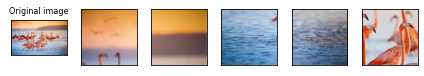

In [5]:
(top_left, top_right, bottom_left, bottom_right, center) = vision.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center], True)

### RandomPerspective

[mindspore.dataset.vision.RandomPerspective](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomPerspective.html#mindspore.dataset.vision.RandomPerspective) 会按照指定的概率对输入图像进行透视变换。

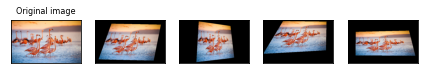

In [6]:
perspective_transformer = vision.RandomPerspective(distortion_scale=0.6, prob=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation

[mindspore.dataset.vision.RandomRotation](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomRotation.html#mindspore.dataset.vision.RandomRotation) 会随机旋转输入图像。

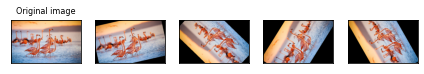

In [7]:
rotater = vision.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine

[mindspore.dataset.vision.RandomAffine](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomAffine.html#mindspore.dataset.vision.RandomAffine) 会对输入图像应用随机仿射变换。

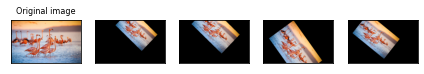

In [8]:
affine_transformer = vision.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transformer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop

[mindspore.dataset.vision.RandomCrop](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomCrop.html#mindspore.dataset.vision.RandomCrop) 会对输入图像进行随机区域的裁剪。



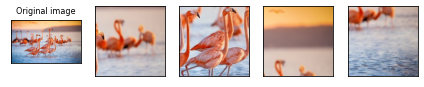

In [9]:
cropper = vision.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop

[mindspore.dataset.vision.RandomResizedCrop](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomResizedCrop.html#mindspore.dataset.vision.RandomResizedCrop) 会对输入图像进行随机裁剪，并将裁剪区域调整为指定的尺寸大小。

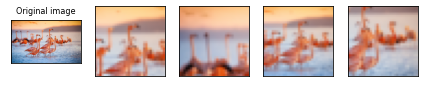

In [10]:
resize_cropper = vision.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

## 光学变换

光学变换是指修改图像的测光属性，如其亮度、对比度、颜色或色调。这些变换的应用是为了改变图像的视觉外观，但保留其几何结构。

### Grayscale

[mindspore.dataset.vision.Grayscale](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.Grayscale.html#mindspore.dataset.vision.Grayscale) 会将图像转换为灰度图。

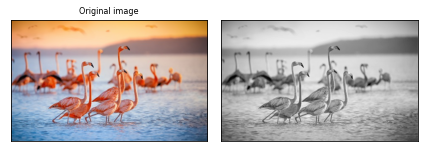

In [11]:
gray_img = vision.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

### RandomColorAdjust

[mindspore.dataset.vision.RandomColorAdjust](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomColorAdjust.html#mindspore.dataset.vision.RandomColorAdjust) 会随机调整输入图像的亮度、对比度、饱和度和色调。

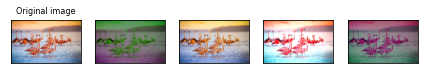

In [12]:
jitter = vision.RandomColorAdjust(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur

[mindspore.dataset.vision.GaussianBlur](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.GaussianBlur.html#mindspore.dataset.vision.GaussianBlur) 会使用指定的高斯核对输入图像进行模糊处理。

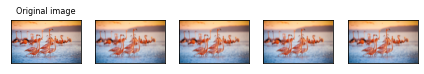

In [13]:
blurrer = vision.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomInvert

[mindspore.dataset.vision.RandomInvert](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomInvert.html#mindspore.dataset.vision.RandomInvert) 会以给定的概率随机反转图像的颜色。



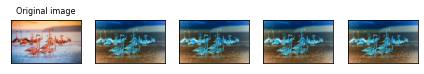

In [14]:
inverter = vision.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

### RandomPosterize

[mindspore.dataset.vision.RandomPosterize](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomPosterize.html#mindspore.dataset.vision.RandomPosterize) 会随机减少图像的颜色通道的比特位数，使图像变得高对比度和颜色鲜艳。



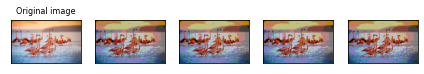

In [15]:
posterizer = vision.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot(posterized_imgs)

### RandomSolarize

[mindspore.dataset.vision.RandomSolarize](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomSolarize.html#mindspore.dataset.vision.RandomSolarize) 会随机翻转给定范围内的像素。



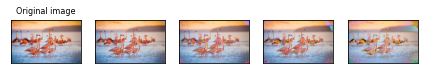

In [16]:
solarizer = vision.RandomSolarize(threshold=(0, 192))
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness

[mindspore.dataset.vision.RandomAdjustSharpness](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomAdjustSharpness.html#mindspore.dataset.vision.RandomAdjustSharpness) 会以给定的概率随机调整输入图像的锐度。



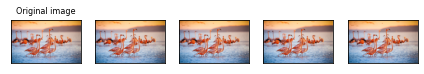

In [17]:
sharpness_adjuster = vision.RandomAdjustSharpness(degree=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandomAutoContrast

[mindspore.dataset.vision.RandomAutoContrast](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomAutoContrast.html#mindspore.dataset.vision.RandomAutoContrast) 会以给定的概率自动调整图像的对比度。

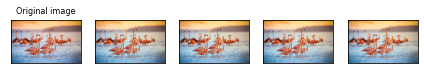

In [18]:
autocontraster = vision.RandomAutoContrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize

[mindspore.dataset.vision.RandomEqualize](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomEqualize.html#mindspore.dataset.vision.RandomEqualize) 会以给定的概率随机对输入图像进行直方图均衡化。



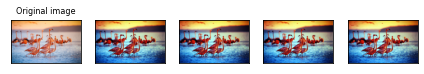

In [19]:
equalizer = vision.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

## 增强变换

以下的变换是多个变换的组合，通常来自论文提出的一些高效数据增强方法。

### AutoAugment

[mindspore.dataset.vision.AutoAugment](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.AutoAugment.html#mindspore.dataset.vision.AutoAugment) 会应用AutoAugment数据增强方法，增强的实现基于基于论文[AutoAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1805.09501.pdf)。

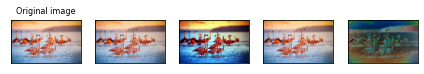

In [20]:
augmenter = vision.AutoAugment(policy=vision.AutoAugmentPolicy.IMAGENET)
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### RandAugment

[mindspore.dataset.vision.RandAugment](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandAugment.html#mindspore.dataset.vision.RandAugment) 会对输入图像应用RandAugment数据增强方法，增强的实现基于基于论文[RandAugment: Learning Augmentation Strategies from Data](https://arxiv.org/pdf/1909.13719.pdf)。



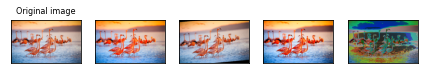

In [21]:
augmenter = vision.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### TrivialAugmentWide

[mindspore.dataset.vision.TrivialAugmentWide](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.TrivialAugmentWide.html#mindspore.dataset.vision.TrivialAugmentWide)会对输入图像应用TrivialAugmentWide数据增强方法，增强的实现基于基于论文[TrivialAugmentWide: Tuning-free Yet State-of-the-Art Data Augmentation](https://arxiv.org/abs/2103.10158)。


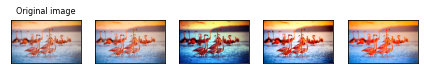

In [22]:
augmenter = vision.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

## 随机应用的变换

有些变换是以按照给定概率随机应用的。也就是说，转换后的图像可能与原始图像相同。

### RandomHorizontalFlip

[mindspore.dataset.vision.RandomHorizontalFlip](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomHorizontalFlip.html#mindspore.dataset.vision.RandomHorizontalFlip)会对输入图像进行水平随机翻转。

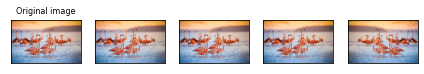

In [23]:
hflipper = vision.RandomHorizontalFlip(0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip

[mindspore.dataset.vision.RandomVerticalFlip](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_vision/mindspore.dataset.vision.RandomVerticalFlip.html#mindspore.dataset.vision.RandomVerticalFlip) 会对输入图像进行垂直随机翻转。

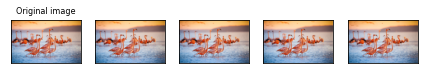

In [24]:
vflipper = vision.RandomVerticalFlip(0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomApply

[mindspore.dataset.transforms.RandomApply](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset_transforms/mindspore.dataset.transforms.RandomApply.html#mindspore.dataset.transforms.RandomApply) 可以指定一组数据增强处理及其被应用的概率，在运算时按概率随机应用其中的增强处理。

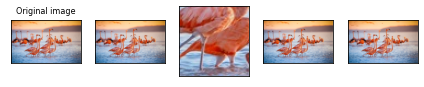

In [25]:
import mindspore.dataset.transforms as T

applier = T.RandomApply(transforms=[vision.RandomCrop(size=(64, 64))], prob=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

## 在数据Pipeline中加载和处理图像文件

使用 [mindspore.dataset.ImageFolderDataset](https://mindspore.cn/docs/zh-CN/r2.2/api_python/dataset/mindspore.dataset.ImageFolderDataset.html#mindspore.dataset.ImageFolderDataset) 将磁盘中的图像文件内容加载到数据Pipeline中，并进一步应用其他增强操作。


file_sizes: 100%|██████████████████████████| 45.7k/45.7k [00:00<00:00, 1.01MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
column names: ['image', 'label']
>>>>> after decode
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 0
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 1
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 2
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 3
(64, 64, 3) 4
(64, 64, 3) 4
(64, 64, 3) 4
>>>>> after resize
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 0
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 1
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 2
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 3
(48, 48, 3) 4
(48, 48, 3) 4
(48, 48, 3) 4


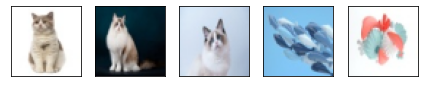

In [26]:
from download import download

import os
import mindspore.dataset as ds

# Download a small imagenet as example
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/imageset.zip"
download(url, "./", kind="zip", replace=True)

# There are 5 classes in the image folder.
os.listdir("./imageset")

# Load these 5 classes into dataset pipeline
dataset = ds.ImageFolderDataset("./imageset", shuffle=False)

# check the column names inside the dataset. "image" column represents the image content and "label" column represents the corresponding label of image.
print("column names:", dataset.get_col_names())

# since the original image is not decoded, apply decode first on "image" column
dataset = dataset.map(vision.Decode(), input_columns=["image"])

# check results
print(">>>>> after decode")
for data, label in dataset:
    print(data.shape, label)

# let's do some transforms on dataset
# apply resize on images
dataset = dataset.map(vision.Resize(size=(48, 48)), input_columns=["image"])

# check results
print(">>>>> after resize")
images = []
for image, label in dataset:
    images.append(image.asnumpy())
    print(image.shape, label)

plot(images[:5], first_origin=False)